It is recommended to read the tutorial on using pyDSA on a single image before doing this tutorial.

## Importing a video

Importing works in the same way than for an image.
Importing images in Python can easily fill your memory, you can import only some images of the video by using the `incr` argument.

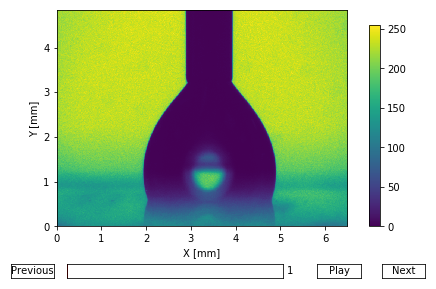

In [1]:
import pyDSA as dsa
import matplotlib.pyplot as plt

# Import an image
ims = dsa.import_from_video('data/video.mp4',
                            dx=1/120, dy=1/120, dt=1/10,
                            unit_x='mm', unit_y='mm', unit_t='s',
                            incr=1)

# Display
ims.display()
plt.show()

## Detecting the edges and contact angles

The method is similar than for a single image: setting the baseline, detecting the edges, fitting the edges, and computing the contact angles.

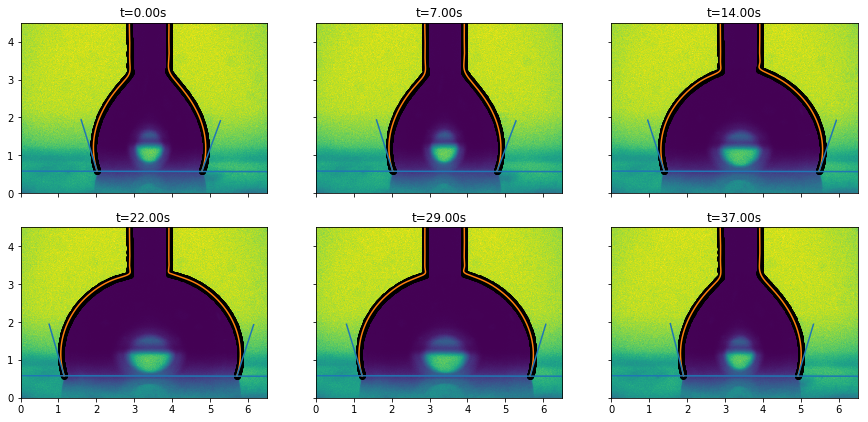

In [2]:
ims.set_baseline([0.0, 0.583],
                 [6.492, 0.57])
edges = ims.edge_detection()
edges.fit()
edges.compute_contact_angle()

# Display
fig, axs = plt.subplots(2, 3, figsize=(15, 6.9), sharex=True, sharey=True)
for i, ax in enumerate(axs.flat):
    plt.sca(ax)
    ind = int(i/5*(len(ims) - 1))
    ims[ind]._display()
    edges[ind].display()
    plt.xlabel('')
    plt.ylabel('')
    plt.title('t={:.2f}s'.format(ims.times[ind]))
plt.xlim(0, 6.5)
plt.ylim(0, 4.5)
plt.show()

## Plotting the drop properties evolution

You can then display a summary of the drop properties evolution.

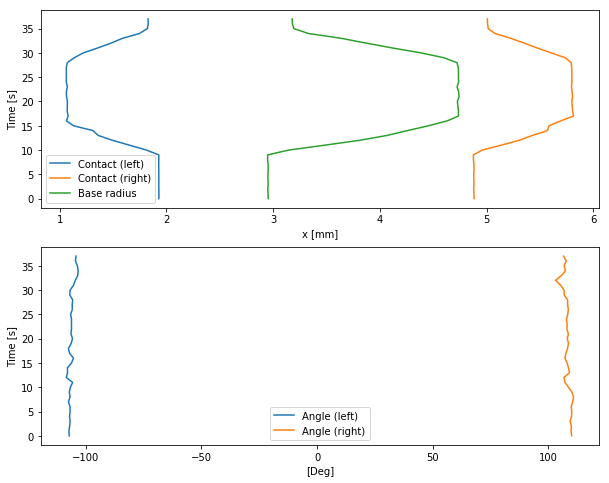

In [3]:
edges.display_summary(figsize=(10, 8))
plt.show()

## Accessing the drop properties

Angles are defined in the trigonometric sens, from the horizontal.

In [4]:
thetas, thetas_t = edges.get_contact_angles()
print("=== Left contact angle: ===")
print(thetas[:, 0])
print("\n=== Right contact angle: ===")
print(thetas[:, 1])

radius = edges.get_drop_base()
print("\n=== Drop base: ===")
print(radius)

=== Left contact angle: ===
[107.23888862 107.37400597 107.05007046 106.86408573 107.09403969
 106.87152793 106.89288488 107.58136308 106.87594673 107.19126851
 106.7112947  105.7573553  108.49189273 107.93621437 108.02598317
 106.22630943 105.39799791 107.07903966 107.56878519 106.39527947
 105.81315002 106.46467088 106.25154551 106.26044864 106.23025799
 106.62498501 105.91004866 105.93039563 105.74143665 107.00158745
 106.8341172  105.38875097 104.60591926 103.55222994 103.38568201
 103.69710654 104.54526798 104.28718362]

=== Right contact angle: ===
[69.81007431 70.06452567 69.94918814 70.46867058 69.86748429 69.78341881
 70.00252248 69.35932262 68.97432279 69.70237737 71.18163723 72.69288788
 73.16778647 70.7287935  71.19678366 71.79424    72.74553129 72.31503295
 71.58481928 71.18967459 71.6835157  71.24023387 71.86786301 71.76356703
 72.05721971 71.50635367 71.23118285 71.56113545 71.56776239 73.05972939
 73.08250744 74.56329023 76.79512481 74.20533479 72.49144642 73.07689257
 